# Image_ML

## Open CV를 이용한 MNIST 데이터 가져오기

In [1]:
''' ref1: http://yann.lecun.com/exdb/mnist/
    ref2: https://gist.github.com/ischlag/41d15424e7989b936c1609b53edd1390
'''
import gzip
import numpy as np
import cv2

IMAGE_SIZE = 28
PIXEL_DEPTH = 255
NUM_LABELS = 10

#1
def extract_data(filename, num_images):
  '''Extract the images into a 4D tensor [image index, y, x, channels].
     Values are rescaled from [0, 255] down to [0, 1].
  '''
##  print('Extracting', filename)
  with gzip.open(filename) as bytestream:
    bytestream.read(16)
    buf = bytestream.read(IMAGE_SIZE * IMAGE_SIZE * num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
##    data = data/PIXEL_DEPTH
    data = data.reshape(num_images, IMAGE_SIZE, IMAGE_SIZE)
    return data

def extract_labels(filename, num_images):
  '''Extract the labels into a vector of int64 label IDs.'''
##  print('Extracting', filename)
  with gzip.open(filename) as bytestream:
    bytestream.read(8)
    buf = bytestream.read(1 * num_images)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int32)
  return labels

def ont_hot_encoding(y): # assume that y is 1-D array
    t = np.zeros((y.size, 10), dtype=np.float32)
    for i, row in enumerate(t):
        row[y[i]] = 1      
    return t
  
# Extract it into np arrays.
def load_MINIST(flatten=True, one_hot=True):
  x_train=extract_data('./data/train-images-idx3-ubyte.gz',  60000)
  y_train=extract_labels('./data/train-labels-idx1-ubyte.gz',60000)
  x_test =extract_data('./data/t10k-images-idx3-ubyte.gz',   10000)
  y_test =extract_labels('./data/t10k-labels-idx1-ubyte.gz', 10000)

  if flatten:
    x_train= x_train.reshape(-1, IMAGE_SIZE*IMAGE_SIZE) # (60000, 784)
    x_test = x_test.reshape(-1, IMAGE_SIZE*IMAGE_SIZE)  # (10000, 784)
  if one_hot:
    y_train = ont_hot_encoding(y_train)
    y_test = ont_hot_encoding(y_test)    
  return (x_train, y_train), (x_test, y_test)

#2
(x_train, y_train), (x_test, y_test) = load_MINIST()
print('x_train.shape=', x_train.shape) # (60000, 784)
print('y_train.shape=', y_train.shape) # (60000, 10)
print('x_test.shape=',  x_test.shape)  # (10000, 784)
print('y_test.shape=',  y_test.shape)  # (10000, 10)

dst = np.zeros((20*IMAGE_SIZE, 20*IMAGE_SIZE), dtype=np.uint8)
for i in range(400):
  x = i%20
  y = i//20
  x1 = x*IMAGE_SIZE
  y1 = y*IMAGE_SIZE
  x2 = x1+IMAGE_SIZE
  y2 = y1+IMAGE_SIZE  
  
  img = x_train[i].astype(np.uint8)
  img = img.reshape(IMAGE_SIZE, IMAGE_SIZE)
  dst[y1:y2, x1:x2] = img

cv2.imshow('MINIST 400', dst)
cv2.waitKey()
cv2.destroyAllWindows()

x_train.shape= (60000, 784)
y_train.shape= (60000, 10)
x_test.shape= (10000, 784)
y_test.shape= (10000, 10)


## OpenCV 의 인공 신경망 분류 모델

### 2층 신경망 랜덤 샘플링 미니배치

train_accuracy[0]=0.8647166666666667, train_loss=2.137570833333333
train_accuracy[60]=0.88525, train_loss=2.0584998697916665
train_accuracy[120]=0.89495, train_loss=2.0082640625
train_accuracy[180]=0.8987833333333334, train_loss=1.984890625
train_accuracy[240]=0.8917, train_loss=2.0098609375
train_accuracy[300]=0.90835, train_loss=1.960669921875
train_accuracy[360]=0.9103333333333333, train_loss=1.946646875
train_accuracy[420]=0.9121166666666667, train_loss=1.9405240885416666
train_accuracy[480]=0.9163666666666667, train_loss=1.9270641927083334
train_accuracy[540]=0.9134333333333333, train_loss=1.933655859375
train_accuracy[600]=0.9160333333333334, train_loss=1.9169928385416666
train_accuracy[660]=0.9202, train_loss=1.9119923177083333
train_accuracy[720]=0.9203166666666667, train_loss=1.9059169270833334
train_accuracy[780]=0.9204666666666667, train_loss=1.8953319010416667
train_accuracy[840]=0.92145, train_loss=1.9087641927083334
train_accuracy[900]=0.925, train_loss=1.9014984375
train

train_accuracy[7680]=0.9497166666666667, train_loss=1.79722578125
train_accuracy[7740]=0.9468, train_loss=1.8052684895833333
train_accuracy[7800]=0.95025, train_loss=1.7978463541666667
train_accuracy[7860]=0.9492333333333334, train_loss=1.8023747395833334
train_accuracy[7920]=0.9484666666666667, train_loss=1.8010420572916668
train_accuracy[7980]=0.9485833333333333, train_loss=1.809854296875
train_accuracy[8040]=0.9484666666666667, train_loss=1.805144140625
train_accuracy[8100]=0.9466333333333333, train_loss=1.81328125
train_accuracy[8160]=0.9483833333333334, train_loss=1.8022708333333333
train_accuracy[8220]=0.9475833333333333, train_loss=1.8062204427083333
train_accuracy[8280]=0.9505666666666667, train_loss=1.8085927083333333
train_accuracy[8340]=0.9487666666666666, train_loss=1.8000412760416666
train_accuracy[8400]=0.9487333333333333, train_loss=1.8045203125
train_accuracy[8460]=0.9491333333333334, train_loss=1.7997178385416666
train_accuracy[8520]=0.9481333333333334, train_loss=1.80

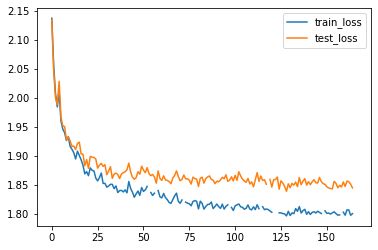

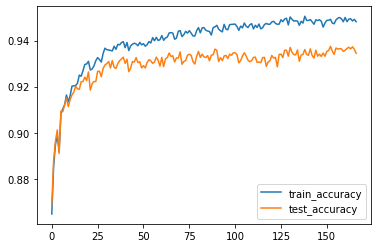

In [1]:
''' ref1: http://yann.lecun.com/exdb/mnist/
    ref2: https://gist.github.com/ischlag/41d15424e7989b936c1609b53edd1390
'''
import gzip
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMAGE_SIZE  = 28
PIXEL_DEPTH = 255
NUM_LABELS  = 10

#1
def extract_data(filename, num_images):
  '''Extract the images into a 4D tensor [image index, y, x, channels].
     Values are rescaled from [0, 255] down to [0, 1].
  '''
##  print('Extracting', filename)
  with gzip.open(filename) as bytestream:
    bytestream.read(16)
    buf = bytestream.read(IMAGE_SIZE * IMAGE_SIZE * num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
##    data = data/PIXEL_DEPTH
    data = data.reshape(num_images, IMAGE_SIZE, IMAGE_SIZE)
    return data

def extract_labels(filename, num_images):
  '''Extract the labels into a vector of int64 label IDs.'''
##  print('Extracting', filename)
  with gzip.open(filename) as bytestream:
    bytestream.read(8)
    buf = bytestream.read(1 * num_images)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int32)
  return labels

def ont_hot_encoding(y): # assume that y is 1-D array
    t = np.zeros((y.size, 10), dtype=np.float32)
    for i, row in enumerate(t):
        row[y[i]] = 1      
    return t
  
# Extract it into np arrays.
def load_MINIST(flatten=True, one_hot=True):
  x_train=extract_data('./data/train-images-idx3-ubyte.gz',  60000)
  y_train=extract_labels('./data/train-labels-idx1-ubyte.gz',60000)
  x_test =extract_data('./data/t10k-images-idx3-ubyte.gz',   10000)
  y_test =extract_labels('./data/t10k-labels-idx1-ubyte.gz', 10000)

  if flatten:
    x_train= x_train.reshape(-1, IMAGE_SIZE*IMAGE_SIZE) # (60000, 784)
    x_test = x_test.reshape(-1, IMAGE_SIZE*IMAGE_SIZE)  # (10000, 784)
  if one_hot:
    y_train = ont_hot_encoding(y_train)
    y_test = ont_hot_encoding(y_test)    
  return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_MINIST()
#2
ann = cv2.ml.ANN_MLP_create()
ann.setLayerSizes(np.array([784, 100, 10]))
ann.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)
ann.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM)
ann.setTermCriteria((cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_COUNT,1,1e-5))

trainData = cv2.ml.TrainData_create(samples=x_train,
                                    layout=cv2.ml.ROW_SAMPLE,
                                    responses=y_train)
ret = ann.train(trainData)

#3
train_loss_list     = []
train_accuracy_list = []
test_loss_list      = []
test_accuracy_list  = []

batch_size = 1000
train_size = 60000

iters_num  = 10000
iter_per_epoch = train_size//batch_size

for i in range(iters_num):
#3-1
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  y_batch = y_train[batch_mask]
  
  trainData = cv2.ml.TrainData_create(samples=x_batch,
                                      layout=cv2.ml.ROW_SAMPLE,
                                      responses=y_batch)    
  ret = ann.train(trainData, flags=cv2.ml.ANN_MLP_UPDATE_WEIGHTS)

#3-2
  if i % iter_per_epoch == 0:    
    y_target = np.argmax(y_train, axis=1)
    ret, res_train = ann.predict(x_train)
    y_predict = np.argmax(res_train, axis = 1)
    train_accuracy = np.sum(y_target==y_predict)/len(y_target)
    train_loss = np.sum((y_train-res_train)**2)
    train_loss /= x_train.shape[0] # 60000
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)

    y_target = np.argmax(y_test, axis=1)
    ret, res_test = ann.predict(x_test)
    y_predict = np.argmax(res_test, axis = 1)
    test_accuracy = np.sum(y_target==y_predict)/len(y_target)
    test_loss = np.sum((y_test-res_test)**2)
    test_loss /= x_test.shape[0] # 10000
    test_accuracy_list.append(test_accuracy)
    test_loss_list.append(test_loss)
    
    print('train_accuracy[{}]={}, '.format(i, train_accuracy), end='')
    print('train_loss={}'.format(train_loss))

#4
ann.save('./data/ann-minist_2layer_BP.train')

x = list(range(len(train_loss_list)))
plt.plot(x, train_loss_list, label='train_loss')
plt.plot(x, test_loss_list, label='test_loss')

plt.legend(loc='best')
plt.show()

plt.plot(x, train_accuracy_list, label='train_accuracy')
plt.plot(x, test_accuracy_list, label='test_accuracy')
plt.legend(loc='best')
plt.show()


### 미니배치를 이용하지 않고 학습

In [ ]:
''' ref1: http://yann.lecun.com/exdb/mnist/
    ref2: https://gist.github.com/ischlag/41d15424e7989b936c1609b53edd1390
'''
import gzip
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMAGE_SIZE  = 28
PIXEL_DEPTH = 255
NUM_LABELS  = 10

#1
def extract_data(filename, num_images):
  '''Extract the images into a 4D tensor [image index, y, x, channels].
     Values are rescaled from [0, 255] down to [0, 1].
  '''
##  print('Extracting', filename)
  with gzip.open(filename) as bytestream:
    bytestream.read(16)
    buf = bytestream.read(IMAGE_SIZE * IMAGE_SIZE * num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
##    data = data/PIXEL_DEPTH
    data = data.reshape(num_images, IMAGE_SIZE, IMAGE_SIZE)
    return data

def extract_labels(filename, num_images):
  '''Extract the labels into a vector of int64 label IDs.'''
##  print('Extracting', filename)
  with gzip.open(filename) as bytestream:
    bytestream.read(8)
    buf = bytestream.read(1 * num_images)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int32)
  return labels

def ont_hot_encoding(y): # assume that y is 1-D array
    t = np.zeros((y.size, 10), dtype=np.float32)
    for i, row in enumerate(t):
        row[y[i]] = 1      
    return t
  
# Extract it into np arrays.
def load_MINIST(flatten=True, one_hot=True):
  x_train=extract_data('./data/train-images-idx3-ubyte.gz',60000)
  y_train=extract_labels('./data/train-labels-idx1-ubyte.gz',60000)
  x_test=extract_data('./data/t10k-images-idx3-ubyte.gz',10000)
  y_test=extract_labels('./data/t10k-labels-idx1-ubyte.gz',10000)

  if flatten:
    x_train= x_train.reshape(-1, IMAGE_SIZE*IMAGE_SIZE) # (60000, 784)
    x_test = x_test.reshape(-1, IMAGE_SIZE*IMAGE_SIZE)  # (10000, 784)
  if one_hot:
    y_train = ont_hot_encoding(y_train)
    y_test = ont_hot_encoding(y_test)    
  return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_MINIST()

#2
ann = cv2.ml.ANN_MLP_create()
ann.setLayerSizes(np.array([784, 100, 10]))
##ann.setLayerSizes(np.array([784, 50, 50, 10]))

##ann.setTrainMethod(cv2.ml.ANN_MLP_RPROP)
ann.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM)
ann.setTermCriteria((cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_COUNT,20,1e-5))

trainData = cv2.ml.TrainData_create(samples=x_train,
                                    layout=cv2.ml.ROW_SAMPLE,
                                    responses=y_train)
ret = ann.train(trainData)

#3
train_loss_list     = []
train_accuracy_list = []
test_loss_list      = []
test_accuracy_list  = []

train_size = 60000
iters_num  = 100

for i in range(iters_num):
  ret = ann.train(trainData, flags=cv2.ml.ANN_MLP_UPDATE_WEIGHTS)

  y_target = np.argmax(y_train, axis=1)
  ret, res_train = ann.predict(x_train)
  y_predict = np.argmax(res_train, axis = 1)
  train_accuracy = np.sum(y_target==y_predict)/len(y_target)
  train_loss = np.sum((y_train-res_train)**2)
  train_loss /= x_train.shape[0] # 60000
  train_accuracy_list.append(train_accuracy)
  train_loss_list.append(train_loss)

  y_target = np.argmax(y_test, axis=1)
  ret, res_test = ann.predict(x_test)
  y_predict = np.argmax(res_test, axis = 1)
  test_accuracy = np.sum(y_target==y_predict)/len(y_target)
  test_loss = np.sum((y_test-res_test)**2)
  test_loss /= x_test.shape[0] # 10000
  test_accuracy_list.append(test_accuracy)
  test_loss_list.append(test_loss)
    
  print('train_accuracy[{}]={}, '.format(i, train_accuracy), end='')
  print('test_accuracy={}'.format(test_accuracy))
  
print('train_loss={}, '.format(train_loss), end='')
print('test_loss={}'.format(test_loss))
  
#4
ann.save('./data/ann-minist_2layer_100RPROP.train')
##ann.save('./data/ann-minist_3layer_50RPROP.train')

x = list(range(len(train_loss_list)))
plt.plot(x, train_loss_list, label='train_loss')
plt.plot(x, test_loss_list, label='test_loss')

plt.legend(loc='best')
plt.show()

plt.plot(x, train_accuracy_list, label='train_accuracy')
plt.plot(x, test_accuracy_list, label='test_accuracy')
plt.legend(loc='best')
plt.show()


train_accuracy[0]=0.9280333333333334, test_accuracy=0.903
train_accuracy[1]=0.9226833333333333, test_accuracy=0.8878
train_accuracy[2]=0.9163333333333333, test_accuracy=0.8807
train_accuracy[3]=0.9225166666666667, test_accuracy=0.8912
train_accuracy[4]=0.9298166666666666, test_accuracy=0.9021
train_accuracy[5]=0.9316333333333333, test_accuracy=0.9094
train_accuracy[6]=0.9420833333333334, test_accuracy=0.9193
train_accuracy[7]=0.94235, test_accuracy=0.9271
train_accuracy[8]=0.9459166666666666, test_accuracy=0.9287
train_accuracy[9]=0.9449, test_accuracy=0.9266
train_accuracy[10]=0.94635, test_accuracy=0.9257
train_accuracy[11]=0.94815, test_accuracy=0.9283
train_accuracy[12]=0.94775, test_accuracy=0.9266
train_accuracy[13]=0.9511833333333334, test_accuracy=0.9292
train_accuracy[14]=0.9528, test_accuracy=0.9309
train_accuracy[15]=0.95245, test_accuracy=0.9318
train_accuracy[16]=0.9544833333333334, test_accuracy=0.9326
train_accuracy[17]=0.9533166666666667, test_accuracy=0.9306
train_accu

### 이전 모델을 이용한 학습

In [ ]:
import cv2
import numpy as np

#1
ann = cv2.ml_ANN_MLP.load('./data/ann-minist_2layer_BP.train')

#2
def onMouse(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.circle(dst, (x, y), 10, (255, 255, 255), -1)
    cv2.imshow('dst', dst)
    
dst  = np.zeros(shape=(512, 512, 3), dtype=np.uint8)
cv2.imshow('dst',dst)
cv2.setMouseCallback('dst', onMouse)
    
mode   = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
font = cv2.FONT_HERSHEY_SIMPLEX  
x_img = np.zeros(shape=(28, 28), dtype=np.uint8)
#3
while True:
    key = cv2.waitKey(25)    
    if key == 27: 
        break;
    elif key == ord('r'):
        dst[:,:] = 0
        cv2.imshow('dst',dst)
    elif key == ord(' '):
        gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
        contours, _ = cv2.findContours(gray, mode, method)

        for i, cnt in enumerate(contours):
#3-1
            x, y, width, height = cv2.boundingRect(cnt)
            cv2.rectangle(dst, (x, y), (x+width, y+height), (0,0,255), 2)
            cx, cy = x + width/2, y + height/2
            if width > height:
                r = width/2
            else:
                r = height/2            
##            (cx,cy),r = cv2.minEnclosingCircle(cnt)
            cx, cy, r= int(cx), int(cy), int(r)
            img = gray[cy-r:cy+r, cx-r:cx+r]
            img = cv2.resize(img, dsize=(20, 20),interpolation=cv2.INTER_AREA)            
            x_img[:,:] = 0
            x_img[4:24, 4:24] = img
            x_img = cv2.dilate(x_img, None, 2)
            x_img = cv2.erode(x_img, None, 4)
            cv2.imshow('x_img', x_img)
#3-2
            x_test = np.float32(x_img.flatten())
            _, res = ann.predict(x_test.reshape(-1, 784))
##            print('res=', res)
            y_predict = np.argmax(res, axis = 1)
            print('y_predict=', y_predict)
            digit = int(y_predict[0])
            cv2.putText(dst, str(digit), (x, y), font, 3, (255,0,0), 5)
        
        cv2.imshow('dst',dst)
cv2.destroyAllWindows()

y_predict= [1]


## 유사 이미지 검출

### Average Hash

In [2]:
from PIL import Image
import numpy as np

# 이미지 데이터를 Average Hash로 변환하기 --- (※1)
def average_hash(fname, size = 16):
    img = Image.open(fname) # 이미지 데이터 열기---(※2)
    img = img.convert('L') # 그레이스케일로 변환하기 --- (※3)
    img = img.resize((size, size), Image.ANTIALIAS) # 리사이즈하기 --- (※4)
    pixel_data = img.getdata() # 픽셀 데이터 가져오기 --- (※5)
    pixels = np.array(pixel_data) # Numpy 배열로 변환하기 --- (※6)
    pixels = pixels.reshape((size, size)) # 2차원 배열로 변환하기 --- (※7)
    avg = pixels.mean() # 평균 구하기 --- (※8)
    diff = 1 * (pixels > avg) # 평균보다 크면 1, 작으면 0으로 변환하기 --- (※9)
    return diff

# 이진 해시로 변환하기 --- (※10)
def np2hash(ahash):
    bhash = []
    for nl in ahash.tolist():
        sl = [str(i) for i in nl]
        s2 = "".join(sl)
        i = int(s2, 2) # 이진수를 정수로 변환하기
        bhash.append("%04x" % i)
    return "".join(bhash)

# Average Hash 출력하기
ahash = average_hash('./data/tower.jpg')
print(ahash)
print(np2hash(ahash))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0]
 [1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0]
 [1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]]
000001000180018003c003c003c087e07ff05ff07ff2cffa9ffe3ffe3ffe1fff


### 많은 이미지에서 유사한 이미지 검색

In [1]:
from PIL import Image
import numpy as np
import os, re
# 파일 경로 지정하기
search_dir = "./data/image"
cache_dir = "./data/image/cache_avhash"
if not os.path.exists(cache_dir):
    os.mkdir(cache_dir)

# 이미지 데이터를 Average Hash로 변환하기 --- (※1)
def average_hash(fname, size = 16):
    fname2 = fname[len(search_dir):]
    # 이미지 캐시하기
    cache_file = cache_dir + "/" + fname2.replace('/', '_') + ".csv"
    if not os.path.exists(cache_file): # 해시 생성하기
        img = Image.open(fname)
        img = img.convert('L').resize((size, size), Image.ANTIALIAS)
        pixels = np.array(img.getdata()).reshape((size, size))
        avg = pixels.mean()
        px = 1 * (pixels > avg)
        np.savetxt(cache_file, px, fmt="%.0f", delimiter=",")
    else: # 캐시돼 있다면 읽지 않기
        px = np.loadtxt(cache_file, delimiter=",")
    return px

# 해밍 거리 구하기 --- (※2)
def hamming_dist(a, b):
    aa = a.reshape(1, -1) # 1차원 배열로 변환하기
    ab = b.reshape(1, -1)
    dist = (aa != ab).sum()
    return dist

# 모든 폴더에 처리 적용하기 --- (※3)
def enum_all_files(path):
    for root, dirs, files in os.walk(path):
        for f in files:
            fname = os.path.join(root, f)
            if re.search(r'\.(jpg|jpeg|png)$', fname):
                yield fname

# 이미지 찾기 --- (※4)
def find_image(fname, rate):
    src = average_hash(fname)
    for fname in enum_all_files(search_dir):
        dst = average_hash(fname)
        diff_r = hamming_dist(src, dst) / 256
        # print("[check] ",fname)
        if diff_r < rate:
            yield (diff_r, fname)

# 찾기 --- (※5)
srcfile = search_dir + "/chair/image_0016.jpg"
html = ""
sim = list(find_image(srcfile, 0.25))
sim = sorted(sim, key=lambda x:x[0])
for r, f in sim:
    print(r, ">", f)
    s = '<div style="float:left;"><h3>[ 차이 :' + str(r) + '-' + \
        os.path.basename(f) + ']</h3>'+ \
        '<p><a href="' + f + '"><img src="' + f + '" width=400>'+ \
        '</a></p></div>'
    html += s

# HTML로 출력하기
html = """<html><head><meta charset="utf8"></head>
<body><h3>원래 이미지</h3><p>
<img src='{0}' width=400></p>{1}
</body></html>""".format(srcfile, html)
with open("./avhash-search-output.html", "w", encoding="utf-8") as f:
    f.write(html)
print("ok")

0.0 > ./data/image/chair/image_0016.jpg
0.22265625 > ./data/image/airplanes/image_0129.jpg
0.2265625 > ./data/image/chair/image_0031.jpg
0.2265625 > ./data/image/stop_sign/image_0019.jpg
0.234375 > ./data/image/umbrella/image_0009.jpg
0.23828125 > ./data/image/airplanes/image_0124.jpg
0.24609375 > ./data/image/dragonfly/image_0001.jpg
0.24609375 > ./data/image/chair/image_0001.jpg
ok


## 이미지 분류

### Caltech101 이미지 분류

#### 이미지 변환

In [2]:
from PIL import Image
import os, glob
import numpy as np
from sklearn.model_selection import train_test_split

# 분류 대상 카테고리 선택하기 --- (※1)
caltech_dir = "./data/image"
categories = ["chair","camera","butterfly","elephant","flamingo"]
nb_classes = len(categories)

# 이미지 크기 지정 --- (※2)
image_w = 64 
image_h = 64
pixels = image_w * image_h * 3

# 이미지 데이터 읽어 들이기 --- (※3)
X = []
Y = []
for idx, cat in enumerate(categories):
    # 레이블 지정 --- (※4)
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    # 이미지 --- (※5)
    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    for i, f in enumerate(files):
        img = Image.open(f) # --- (※6)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)
        X.append(data)
        Y.append(label)
        if i % 10 == 0:
            print(i, "\n", data)
X = np.array(X)
Y = np.array(Y)

# 학습 전용 데이터와 테스트 전용 데이터 구분 --- (※7)
X_train, X_test, y_train, y_test = \
    train_test_split(X, Y)
xy = (X_train, X_test, y_train, y_test)
np.save("./data/image/5obj.npy", xy)
print("ok,", len(Y))

0 
 [[[ 40  24  31]
  [ 33  20  24]
  [ 27  16  20]
  ...
  [ 77  69  93]
  [ 75  66  92]
  [ 70  61  89]]

 [[ 40  25  32]
  [ 34  20  24]
  [ 31  19  23]
  ...
  [ 80  72  96]
  [ 77  68  94]
  [ 75  65  94]]

 [[ 41  26  33]
  [ 35  21  25]
  [ 33  22  26]
  ...
  [ 84  77 100]
  [ 82  74 100]
  [ 78  69  97]]

 ...

 [[189 162 192]
  [189 169 198]
  [175 160 191]
  ...
  [204 173 206]
  [202 170 204]
  [196 164 198]]

 [[154 131 164]
  [141 121 153]
  [137 119 150]
  ...
  [200 170 204]
  [195 165 200]
  [191 161 195]]

 [[129 111 145]
  [165 143 178]
  [184 157 195]
  ...
  [198 168 202]
  [199 169 203]
  [196 166 200]]]
10 
 [[[7 7 7]
  [4 4 4]
  [3 3 3]
  ...
  [4 4 4]
  [4 4 4]
  [8 8 8]]

 [[4 4 4]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [1 1 1]
  [4 4 4]]

 [[4 4 4]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [2 2 2]
  [3 3 3]]

 ...

 [[4 4 4]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [2 2 2]
  [3 3 3]]

 [[4 4 4]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [2 2 2]
  [3 3 3]]

 [[7 7 7]
  [4 

80 
 [[[ 55  49  42]
  [ 58  51  43]
  [ 75  63  65]
  ...
  [209 163 162]
  [184 147 137]
  [185 161 144]]

 [[ 53  56  37]
  [ 47  49  29]
  [ 61  59  48]
  ...
  [126 101  80]
  [143 110 105]
  [225 193 202]]

 [[ 80  85  61]
  [ 73  77  52]
  [ 91  91  75]
  ...
  [146 148 101]
  [190 163 165]
  [246 205 237]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [135 150 105]
  [116 123  88]
  [102 109  78]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 67  79  42]
  [ 69  78  44]
  [ 74  82  52]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 71  83  47]
  [ 71  83  45]
  [ 70  83  44]]]
90 
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255

/Users/adam/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


#### CNN 으로 이미지 분류

In [23]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np

# 카테고리 지정하기
categories = ["chair","camera","butterfly","elephant","flamingo"]
nb_classes = len(categories)

# 이미지 크기 지정하기
image_w = 64 
image_h = 64

# 데이터 불러오기 --- (※1)
X_train, X_test, y_train, y_test = np.load("./data/image/5obj.npy", allow_pickle=True)
# 데이터 정규화하기
X_train = X_train.astype("float") / 256
X_test  = X_test.astype("float")  / 256
print('X_train shape:', X_train.shape)

# 모델 구축하기 --- (※2)
model = Sequential()

print(X_train.shape[1:])
model.add(Convolution2D(32, kernel_size=3, padding='same',input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.25))


model.add(Convolution2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(MaxPooling2D(2))
model.add(Dropout(0.25))

model.add(Flatten()) # --- (※3) 
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])

# 모델 훈련하기 --- (※4)
hdf5_file = "./data/image/5obj-model.hdf5"
if os.path.exists(hdf5_file):
    model.load_weights(hdf5_file)
else:
    model.fit(X_train, y_train, batch_size=32, epochs=50)
    model.save_weights(hdf5_file)
    
# 모델 평가하기--- (※5)
print(X_test.shape)
score = model.evaluate(X_test, y_test)
print('loss=', score[0])
print('accuracy=', score[1])

X_train shape: (250, 64, 64, 3)
(64, 64, 3)
(84, 64, 64, 3)
3/3 [==============================] - 1s 16ms/step - loss: 0.5382 - accuracy: 0.7206
loss= 0.489135205745697
accuracy= 0.738095223903656


### 예측

In [36]:
img = Image.open('./data/image/chair.png')
img = img.convert("RGB")
img = img.resize((image_w, image_h))
data = np.asarray(img)
data = data.astype("float") / 256
data = data.reshape(-1, 64, 64, 3)
score = model.predict(data)
print(score)
for category, prob in enumerate(zip(categories, score[0])):
    print(category, prob)

[[9.9988806e-01 2.7999952e-06 9.4584817e-07 4.5652785e-14 1.0827886e-04]]
0 ('chair', 0.99988806)
1 ('camera', 2.7999952e-06)
2 ('butterfly', 9.4584817e-07)
3 ('elephant', 4.5652785e-14)
4 ('flamingo', 0.00010827886)


### 모델 평가하기

In [38]:
# 모델 평가하기
pre = model.predict(X_test)
for i,v in enumerate(pre):
    pre_ans = v.argmax()
    ans = y_test[i].argmax()
    dat = X_test[i]
    if ans == pre_ans: continue
    print("[NG]", categories[pre_ans], "!=", categories[ans])
    print(v)
    fname = "./data/image/error/" + str(i) + "-" + categories[pre_ans] + \
        "-ne-" + categories[ans] + ".png"
    dat *= 256
    img = Image.fromarray(np.uint8(dat))
    img.save(fname)

[NG] elephant != chair
[0. 0. 0. 1. 0.]
[NG] chair != butterfly
[9.9992096e-01 8.3999779e-21 8.8200629e-09 7.8986428e-05 2.5187868e-12]
[NG] elephant != chair
[1.8270513e-02 1.5842220e-06 5.4390505e-02 9.2733598e-01 1.4643543e-06]
[NG] chair != elephant
[9.8502654e-01 1.1607931e-04 4.1011488e-05 5.7809000e-05 1.4758540e-02]
[NG] elephant != camera
[2.9985080e-04 4.5807310e-03 4.4517943e-01 5.4993993e-01 1.7782527e-09]
[NG] flamingo != chair
[1.3649499e-01 7.9987700e-08 1.8803734e-09 3.1283756e-15 8.6350489e-01]
[NG] elephant != flamingo
[2.4393796e-04 9.6005097e-02 3.5548590e-03 8.9547420e-01 4.7219186e-03]
[NG] butterfly != elephant
[4.4447283e-04 2.8319203e-06 9.9693918e-01 4.2618372e-05 2.5708063e-03]
[NG] butterfly != flamingo
[2.2352284e-09 8.6503330e-20 1.0000000e+00 3.0703858e-15 3.6942367e-08]
[NG] chair != flamingo
[9.8785758e-01 9.5411912e-03 2.3005588e-03 1.2744877e-07 3.0049484e-04]
[NG] butterfly != camera
[9.6826284e-07 3.9146366e-03 9.7874272e-01 4.7780798e-08 1.7341681e

## Object Detection

### 이미지에서 얼굴 검출

In [ ]:
# ref: https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html
import numpy as np
import cv2

faceCascade= cv2.CascadeClassifier(
      './haarcascades/haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier(
    './haarcascades/haarcascade_eye.xml')

src = cv2.imread('./data/lena.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray, 1.1, 3) #(gray, 1.1, 0)

for (x, y, w, h) in faces:
    cv2.rectangle(src, (x,y),(x+w, y+h),(255,0,0), 2)
    
    roi_gray  = gray[y:y+h, x:x+w]
    roi_color = src[y:y+h, x:x+w]
    
    eyes = eyeCascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()


### 유투브 동영상에서 검출

In [ ]:
'''
 pip install youtube_dl
 pip install pafy
'''
import numpy as np
import cv2, pafy

faceCascade= cv2.CascadeClassifier(
      './haarcascades/haarcascade_frontalface_default.xml')

url = 'https://www.youtube.com/watch?v=S_0ikqqccJs'
video = pafy.new(url)
print('title = ', video.title)

best = video.getbest(preftype='mp4')
print('best.resolution', best.resolution)

cap=cv2.VideoCapture(best.url)
while(True):
        retval, frame = cap.read()
        if not retval:
                break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        faces = faceCascade.detectMultiScale(gray) 
        #minSize=(50, 50)
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x,y),(x+w, y+h),(255,0,0), 2)           
        cv2.imshow('frame',frame)
 
        key = cv2.waitKey(25)
        if key == 27: # Esc
                break
cv2.destroyAllWindows()

title =  참이슬 아이유 X 박서준 바이럴영상(30")
best.resolution 1280x720


### 얼굴 모자이크 처리

In [3]:
import cv2, sys, re
# 입력 파일 지정하기 --- (※1)
image_file = './data/photo2.jpg'

# 출력 파일 이름
output_file = re.sub(r'\.jpg|jpeg|PNG$', '-mosaic.jpg', image_file)
print(output_file)
mosaic_rate = 30 

# 캐스캐이드 파일 경로 지정하기
cascade_file = cv2.data.haarcascades + "haarcascade_frontalface_alt.xml"

# 이미지 읽어 들이기 --- (※2)
image = cv2.imread(image_file)
image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # 그레이스케일 변환
# 얼굴 인식 실행하기 --- (※3)
cascade = cv2.CascadeClassifier(cascade_file)
face_list = cascade.detectMultiScale(image_gs,
    scaleFactor=1.1,
    minNeighbors=1,
    minSize=(100,100))
if len(face_list) == 0:
    print("no face")
    quit()
# 확인한 부분에 모자이크 걸기 -- (※4)
print(face_list)
color = (0, 0, 255)
for (x,y,w,h) in face_list:
    # 얼굴 부분 자르기 --- (※5)
    face_img = image[y:y+h, x:x+w]
    # 자른 이미지를 지정한 배율로 확대/축소하기 --- (※6)
    face_img = cv2.resize(face_img, (w//mosaic_rate, h//mosaic_rate))
    # 확대/축소한 그림을 원래 크기로 돌리기 --- (※7)
    face_img = cv2.resize(face_img, (w, h), 
        interpolation=cv2.INTER_AREA)
    # 원래 이미지에 붙이기 --- (※8)
    image[y:y+h, x:x+w] = face_img
# 렌더링 결과를 파일에 출력
cv2.imwrite(output_file, image)

./data/photo2-mosaic.jpg
[[599 481 205 205]
 [293 142 239 239]]


True

## 얼굴 이미지 분류 인식

### AT&T 얼굴 데이터베이스 얼굴 인식 - EigenFaceRecognizer, FisherFaceRecognizer

In [1]:
import cv2
import numpy as np
import random

#1
WIDTH = 92
HEIGHT = 112
def load_face(filename='./data/faces.csv', test_ratio=0.2):
    file = open(filename, 'r')
    lines = file.readlines()

    N = len(lines)
    faces = np.empty((N, WIDTH*HEIGHT), dtype=np.uint8 )
    labels = np.empty(N, dtype = np.int32)
    for i, line in enumerate(lines):
        filename, label = line.strip().split(';')
        labels[i] = int(label)
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        faces[i, :] = img.flatten()
  
# shuffling and seperate train and test data
    indices = list(range(N))
    random.seed(1) # same random sequences, so the same result
    random.shuffle(indices)
    shuffle_faces = faces[indices]
    shuffle_labels = labels[indices]

    test_size = int(test_ratio*N)

    test_faces = shuffle_faces[:test_size]
    test_labels = shuffle_labels[:test_size]

    train_faces = shuffle_faces[test_size:]
    train_labels = shuffle_labels[test_size:]
    return train_faces, train_labels, test_faces, test_labels

#2
train_faces, train_labels, test_faces, test_labels = load_face()
print('train_faces.shape=',  train_faces.shape)
print('train_labels.shape=', train_labels.shape)
print('test_faces.shape=',   test_faces.shape)
print('test_labels.shape=',  test_labels.shape)

#3    
recognizer = cv2.face.EigenFaceRecognizer_create()
##recognizer = cv2.face.FisherFaceRecognizer_create()
recognizer.train(train_faces.reshape(-1, HEIGHT, WIDTH), train_labels)

#4: display eigen Face
eigenFace = recognizer.getEigenVectors()
eigenFace = eigenFace.T
print('eigenFace.shape=',  eigenFace.shape)

dst = np.zeros((8*HEIGHT, 10*WIDTH), dtype=np.uint8)

##for i in range(39): # FisherFaceRecognizer
for i in range(80):
  x = i%10
  y = i//10
  x1 = x*WIDTH
  y1 = y*HEIGHT
  x2 = x1+WIDTH
  y2 = y1+HEIGHT  
  
  img = eigenFace[i].reshape(HEIGHT, WIDTH)
  dst[y1:y2, x1:x2] = cv2.normalize(img,None,0,255,cv2.NORM_MINMAX)
cv2.imshow('eigenFace 80', dst)

#5: predict test_faces using recognizer
correct_count = 0
for i, face in enumerate(test_faces): 
    predict_label, confidence = recognizer.predict(face)
    if test_labels[i]== predict_label:
        correct_count+= 1
    print('test_labels={}: predicted:{}, confidence={}'.format(
                     test_labels[i], predict_label, confidence))
accuracy = correct_count / float(len(test_faces))
print('accuracy=', accuracy)

train_faces.shape= (320, 10304)
train_labels.shape= (320,)
test_faces.shape= (80, 10304)
test_labels.shape= (80,)
eigenFace.shape= (320, 10304)
test_labels=20: predicted:20, confidence=2014.5525962455326
test_labels=15: predicted:15, confidence=1121.1903491079265
test_labels=26: predicted:26, confidence=1274.7274938741857
test_labels=33: predicted:33, confidence=3071.153795486296
test_labels=38: predicted:38, confidence=2470.4316800716247
test_labels=21: predicted:21, confidence=2678.164527128312
test_labels=32: predicted:32, confidence=2509.358882871588
test_labels=34: predicted:34, confidence=2076.6811249837956
test_labels=0: predicted:0, confidence=3471.8626540013893
test_labels=28: predicted:28, confidence=2122.3041822479827
test_labels=5: predicted:5, confidence=2563.997763461227
test_labels=4: predicted:4, confidence=1334.252467895507
test_labels=3: predicted:3, confidence=2274.3981298760664
test_labels=28: predicted:28, confidence=2910.0390937160023
test_labels=22: predicted:22,

### AT&T 얼굴 데이터베이스를 이용한 얼굴 인식 : LBPHFaceRecognizer

In [2]:
import cv2
import numpy as np
import random

#1
WIDTH = 92
HEIGHT = 112
def load_face(filename='./data/faces.csv', test_ratio=0.2):
    file = open(filename, 'r')
    lines = file.readlines()

    N = len(lines)
    faces = np.empty((N, WIDTH*HEIGHT), dtype=np.uint8 )
    labels = np.empty(N, dtype = np.int32)
    for i, line in enumerate(lines):
        filename, label = line.strip().split(';')
        labels[i] = int(label)
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        faces[i, :] = img.flatten()
  
# shuffling and seperate train and test data
    indices = list(range(N))
    random.seed(1) # same random sequences, so the same result
    random.shuffle(indices)
    shuffle_faces = faces[indices]
    shuffle_labels = labels[indices]

    test_size = int(test_ratio*N)

    test_faces = shuffle_faces[:test_size]
    test_labels = shuffle_labels[:test_size]

    train_faces = shuffle_faces[test_size:]
    train_labels = shuffle_labels[test_size:]
    return train_faces, train_labels, test_faces, test_labels

train_faces, train_labels, test_faces, test_labels = load_face()
print('train_faces.shape=',  train_faces.shape)
print('train_labels.shape=', train_labels.shape)
print('test_faces.shape=',   test_faces.shape)
print('test_labels.shape=',  test_labels.shape)

#2    
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.train(train_faces.reshape(-1, HEIGHT, WIDTH), train_labels)
 
#3: predict test_faces using recognizer
correct_count = 0
for i, face in enumerate(test_faces.reshape(-1, HEIGHT, WIDTH)):    
    predict_label, confidence = recognizer.predict(face)
    if test_labels[i]== predict_label:
        correct_count+= 1
    print('test_labels={}: predicted:{}, confidence={}'.format(
                     test_labels[i], predict_label,confidence))
accuracy = correct_count / float(len(test_faces))
print('accuracy=', accuracy)

train_faces.shape= (320, 10304)
train_labels.shape= (320,)
test_faces.shape= (80, 10304)
test_labels.shape= (80,)
test_labels=20: predicted:20, confidence=63.53159239674068
test_labels=15: predicted:15, confidence=56.76836690095442
test_labels=26: predicted:26, confidence=65.35428328380661
test_labels=33: predicted:33, confidence=78.94946641055041
test_labels=38: predicted:38, confidence=75.97988206043449
test_labels=21: predicted:21, confidence=82.08887829286003
test_labels=32: predicted:32, confidence=84.18183984479495
test_labels=34: predicted:34, confidence=72.16901863930305
test_labels=0: predicted:0, confidence=78.75554190227402
test_labels=28: predicted:28, confidence=63.16955227973658
test_labels=5: predicted:5, confidence=69.28946916637393
test_labels=4: predicted:4, confidence=64.63933640341054
test_labels=3: predicted:3, confidence=66.44944519613094
test_labels=28: predicted:28, confidence=73.32473172587548
test_labels=22: predicted:22, confidence=61.721612437042324
test_lab

## 지식 증류

### 필요한 라이브러리 설정

In [4]:
import tensorflow as tf
import numpy as np
import cv2
#from google.colab.patches import cv2_imshow
from tqdm import tqdm

In [5]:
#@title 파라미터 설정
t_ephoc = 10 #@param {type:"slider", min:1, max:100, step:1}
s_ephoc = 5 #@param {type:"slider", min:1, max:100, step:1}
learning_rate = 0.01 
batch_size = 64 #@param [32, 64, 128, 256] {type:"raw"}
temperature = 3 #@param {type:"slider", min:1, max:10, step:1}
alpha = 0.5 #@param {type:"slider", min:0.1, max:0.9, step:0.1}

In [6]:
#MNIST 데이터셋 가져오기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_train = np.reshape(x_train, (-1, 28, 28, 1))

x_test = x_test.astype("float32") / 255.0
x_test = np.reshape(x_test, (-1, 28, 28, 1))

In [7]:
# 파라미터가 많은 모델
i=tf.keras.Input(shape=(28, 28, 1))
out=tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding="same")(i)
out=tf.keras.layers.LeakyReLU(alpha=0.2)(out)
out=tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same")(out)
out=tf.keras.layers.Conv2D(512, (3, 3), strides=(2, 2), padding="same")(out)
out=tf.keras.layers.Flatten()(out)
out=tf.keras.layers.Dense(10)(out)
t_model=tf.keras.Model(inputs=[i],outputs=[out])

t_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 256)       2560      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                250890

2021-08-05 14:02:01.019759: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# 파라미터 적은 모델
i=tf.keras.Input(shape=(28, 28, 1))
out=tf.keras.layers.Flatten()(i)
out=tf.keras.layers.Dense(28)(out)
out=tf.keras.layers.Dense(10)(out)

s_model_1=tf.keras.Model(inputs=[i],outputs=[out])
s_model_2=tf.keras.models.clone_model(s_model_1)

s_model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 28)                21980     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                290       
Total params: 22,270
Trainable params: 22,270
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 파라미터가 많은 모델
t_model.compile(tf.keras.optimizers.Adam(learning_rate),
                tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

# 파라미터가 적은 모델 (distillation 적용)
s_model_1.compile(tf.keras.optimizers.Adam(learning_rate),
                tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

# 비교 모델 (distillation 미적용)
s_model_2.compile(tf.keras.optimizers.Adam(learning_rate),
                tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [10]:
# 파라미터가 많은 모델 훈련
t_model.fit(x_train, y_train,batch_size=batch_size,epochs=t_ephoc)

2021-08-05 14:02:37.763608: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
938/938 [==============================] - 174s 185ms/step - loss: 7.3146 - sparse_categorical_accuracy: 0.9092
Epoch 2/10
938/938 [==============================] - 170s 181ms/step - loss: 4.4825 - sparse_categorical_accuracy: 0.9559
Epoch 3/10
938/938 [==============================] - 173s 185ms/step - loss: 6.2008 - sparse_categorical_accuracy: 0.9551
Epoch 4/10
938/938 [==============================] - 168s 179ms/step - loss: 9.4081 - sparse_categorical_accuracy: 0.9585
Epoch 5/10
938/938 [==============================] - 169s 180ms/step - loss: 9.4651 - sparse_categorical_accuracy: 0.9644
Epoch 6/10
938/938 [==============================] - 161s 172ms/step - loss: 10.5941 - sparse_categorical_accuracy: 0.9671
Epoch 7/10
938/938 [==============================] - 169s 180ms/step - loss: 11.2038 - sparse_categorical_accuracy: 0.9696
Epoch 8/10
938/938 [==============================] - 182s 194ms/step - loss: 13.5882 - sparse_categorical_accuracy: 0.9698
Epoch 9/10
93

In [11]:
# 파라미터가 적은 모델 손실함수
s_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# 비교 모델 손실함수
d_loss = tf.keras.losses.KLDivergence()

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
batch_count = x_train.shape[0]//batch_size

opt = tf.keras.optimizers.Adam(learning_rate)

for e in range(s_ephoc):
    for _ in range(batch_count):
        batch_num=np.random.randint(0, x_train.shape[0], size=batch_size)
        t_pred = t_model.predict(x_train[batch_num])

        with tf.GradientTape() as tape:
            s_pred_1 = s_model_1(x_train[batch_num])
            student_loss = s_loss(y_train[batch_num], s_pred_1)
            distillation_loss = d_loss(
                tf.nn.softmax(t_pred / temperature, axis=1),
                tf.nn.softmax(s_pred_1 / temperature, axis=1),
            )
            loss = alpha * student_loss + (1 - alpha) * distillation_loss

        vars = s_model_1.trainable_variables
        grad = tape.gradient(loss, vars)
        opt.apply_gradients(zip(grad, vars))

        with tf.GradientTape() as tape:
            s_pred_2 = s_model_2(x_train[batch_num])
            student_loss = s_loss(y_train[batch_num], s_pred_2)
        vars = s_model_2.trainable_variables
        grad = tape.gradient(student_loss, vars)
        opt.apply_gradients(zip(grad, vars))

    print("에포크 {}".format(e))
    print("다른 모델을 이용해서 훈련")
    s_model_1.evaluate(x_test, y_test)
    print("단독으로 사용된 경우")
    s_model_2.evaluate(x_test, y_test)
    print("\n")

에포크 0
다른 모델을 이용해서 훈련
313/313 [==============================] - 0s 632us/step - loss: 0.4862 - sparse_categorical_accuracy: 0.8992
단독으로 사용된 경우
313/313 [==============================] - 0s 585us/step - loss: 0.3577 - sparse_categorical_accuracy: 0.9018


에포크 1
다른 모델을 이용해서 훈련
313/313 [==============================] - 0s 506us/step - loss: 0.4249 - sparse_categorical_accuracy: 0.9105
단독으로 사용된 경우
313/313 [==============================] - 0s 503us/step - loss: 0.3281 - sparse_categorical_accuracy: 0.9093


에포크 2
다른 모델을 이용해서 훈련
313/313 [==============================] - 0s 528us/step - loss: 0.4277 - sparse_categorical_accuracy: 0.9101
단독으로 사용된 경우
313/313 [==============================] - 0s 512us/step - loss: 0.3314 - sparse_categorical_accuracy: 0.9101


에포크 3
다른 모델을 이용해서 훈련
313/313 [==============================] - 0s 496us/step - loss: 0.4146 - sparse_categorical_accuracy: 0.9146
단독으로 사용된 경우
313/313 [==============================] - 0s 503us/step - loss: 0.3150 - sparse_categorical